In [1]:
import astropy.io.fits as fits
import os
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u
#https://www.legacysurvey.org/dr9/catalogs/ 

In [2]:
fn_map_rongpu = "/global/cfs/cdirs/desi/users/rongpu/data/imaging_sys/randoms_stats/0.49.0/resolve/combined/pixmap_south_nside_256_minobs_1_maskbits_189111213.fits"
#psfdepth_w1mag_ebv
fn_map_911 = "/global/cfs/cdirs/desi/target/catalogs/dr9/1.1.1/pixweight/main/resolve/dark/pixweight-1-dark.fits"

fn_lrg_ashley = "/global/cfs/cdirs/desi/survey/catalogs/main/LSS/LRGtargetsDR9v1.1.1.fits"
fn_lrgsv3 ="/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/truth/LRG_SV3/sweep/LRG_SV3_south_desi.fits"


In [3]:
dat_lrg = fits.getdata(fn_lrg_ashley)
dat_lrg_sv3 = fits.getdata(fn_lrgsv3)

In [4]:
dat_lrg = fits.getdata(fn_lrg_ashley)
sel = (dat_lrg['ra']>155)&(dat_lrg['ra']<155.5)&(dat_lrg['dec']>10)&(dat_lrg['dec']<10.5)
dat_lrg = dat_lrg[sel]

dat_lrg_sv3 = fits.getdata(fn_lrgsv3)
sel = (dat_lrg_sv3['ra']>155)&(dat_lrg_sv3['ra']<155.5)&(dat_lrg_sv3['dec']>10)&(dat_lrg_sv3['dec']<10.5)
dat_lrg_sv3 = dat_lrg_sv3[sel]

(10.0, 10.5)

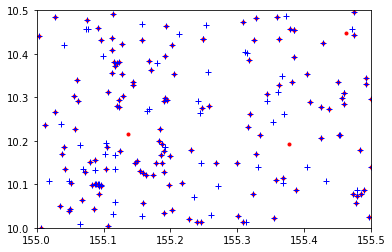

In [5]:
#just a random region
plt.plot(dat_lrg['ra'],dat_lrg['dec'],'r.')
plt.plot(dat_lrg_sv3['ra'],dat_lrg_sv3['dec'],'b+')
plt.gca().set_xlim((155,155.5))
plt.gca().set_ylim((10,10.5))

In [6]:
c1 = SkyCoord(ra=dat_lrg['ra']*u.degree, dec=dat_lrg['dec']*u.degree)
c2 = SkyCoord(ra=np.array(dat_lrg_sv3['ra'])*u.degree, dec=np.array(dat_lrg_sv3['dec'])*u.degree)
idx1, d2d, d3d = c1.match_to_catalog_sky(c2)
matched = d2d.value <= 0.1/3600


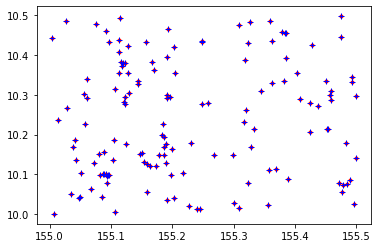

In [7]:
plt.plot(dat_lrg['ra'][matched],dat_lrg['dec'][matched],'r.')
plt.plot(dat_lrg_sv3['ra'][idx1][matched],dat_lrg_sv3['dec'][idx1][matched],'b+')

In [8]:
dat_lrg['psfdepth_g'][matched]-dat_lrg_sv3['psfdepth_g'][idx1][matched]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
dat_lrg['psfdepth_r'][matched]-dat_lrg_sv3['psfdepth_r'][idx1][matched]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
dat_lrg['psfdepth_z'][matched]-dat_lrg_sv3['psfdepth_z'][idx1][matched]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#SAME!

In [11]:
dat_lrg_sv3 = fits.getdata(fn_lrgsv3)
dat_lrg_sv3['psfdepth_w1'].max()

9.458734

In [12]:
np.where(dat_lrg_sv3['psfdepth_w1']==dat_lrg_sv3['psfdepth_w1'].max())

(array([1597383, 1597384, 1597385, 1597386, 1597388]),)

In [13]:
dat_lrg_sv3['ra'][1597383],dat_lrg_sv3['dec'][1597383],dat_lrg_sv3['psfdepth_w1'][1597383]

(255.00147972902283, 32.39421643495082, 9.458734)

In [14]:
sel = (dat_lrg_sv3['ra']>254.9)&(dat_lrg_sv3['ra']<255.1)&(dat_lrg_sv3['dec']>32.3)&(dat_lrg_sv3['dec']<32.5)

(array([1., 0., 7., 0., 8., 0., 2., 0., 0., 4.]),
 array([9.068299, 9.107343, 9.146386, 9.18543 , 9.224473, 9.263516,
        9.30256 , 9.341603, 9.380647, 9.41969 , 9.458734], dtype=float32),
 <a list of 10 Patch objects>)

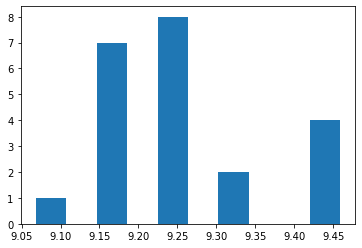

In [15]:
plt.hist(dat_lrg_sv3['psfdepth_w1'][sel])

In [19]:
-2.5*(np.log10(5/np.sqrt(dat_lrg_sv3['psfdepth_w1'][sel]))-9)-0.184*dat_lrg_sv3['ebv'][sel]


array([21.949438, 21.949373, 21.94941 , 21.94941 , 21.94938 , 21.949366,
       21.949322, 21.967165, 21.966993, 21.967161, 21.967133, 21.944183,
       21.954765, 21.954792, 21.9548  , 21.954353, 21.9544  , 21.954393,
       21.954515, 21.954596, 21.958588, 21.9586  ], dtype=float32)

(array([ 2.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  4., 12.]),
 array([422.8968 , 470.28873, 517.68066, 565.07263, 612.4646 , 659.85657,
        707.2485 , 754.64044, 802.0324 , 849.4243 , 896.8163 ],
       dtype=float32),
 <a list of 10 Patch objects>)

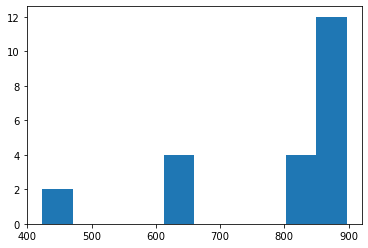

In [16]:
plt.hist(dat_lrg_sv3['psfdepth_g'][sel])

In [25]:
randoms = fits.getdata("/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/south/randoms/randoms-south-1-0.fits")
sel = (randoms['ra']>254.9)&(randoms['ra']<255.1)&(randoms['dec']>32.3)&(randoms['dec']<32.5)

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  2.,  6., 12., 51.]),
 array([1.1701441, 1.6342744, 2.0984046, 2.562535 , 3.0266652, 3.4907956,
        3.954926 , 4.4190564, 4.8831863, 5.3473167, 5.811447 ],
       dtype=float32),
 <a list of 10 Patch objects>)

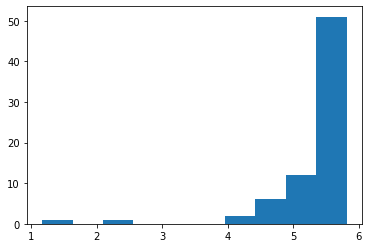

In [26]:
plt.hist(randoms['psfdepth_w1'][sel])

In [27]:
-2.5*(np.log10(5/np.sqrt(randoms['psfdepth_w1'][sel]))-9)-0.184*randoms['ebv'][sel]

array([21.67437 , 21.598803, 21.677057, 21.693422, 21.651363, 21.68745 ,
       21.673819, 21.233452, 21.670216, 21.637665, 21.653263, 21.659958,
       21.685675, 21.678242, 20.832638, 21.681383, 21.686296, 21.682903,
       21.683935, 21.695482, 21.662703, 21.678288, 21.682632, 21.580172,
       21.654354, 21.550926, 21.693491, 21.676556, 21.668356, 21.670862,
       21.651457, 21.657993, 21.609896, 21.658525, 21.694614, 21.693031,
       21.683065, 21.691933, 21.677696, 21.696411, 21.619837, 21.643333,
       21.585846, 21.677055, 21.661375, 21.69353 , 21.538263, 21.67566 ,
       21.615835, 21.671291, 21.674524, 21.665983, 21.590658, 21.65244 ,
       21.678122, 21.689188, 21.679647, 21.676937, 21.678276, 21.65944 ,
       21.598263, 21.672775, 21.68548 , 21.68846 , 21.675926, 21.702757,
       21.65644 , 21.696026, 21.684069, 21.561852, 21.653381, 21.67259 ,
       21.67869 ], dtype=float32)

(array([10.,  0.,  0.,  0., 10.,  2.,  0.,  0., 28., 23.]),
 array([422.00082, 469.48236, 516.9639 , 564.44543, 611.927  , 659.40857,
        706.8901 , 754.37164, 801.8532 , 849.3347 , 896.8163 ],
       dtype=float32),
 <a list of 10 Patch objects>)

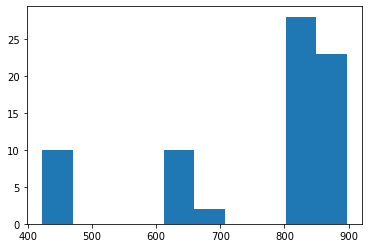

In [10]:
plt.hist(randoms['psfdepth_g'][sel])

In [22]:
u = fits.getdata(fn_map_rongpu)
sel = (u['ra']>254.9)&(u['ra']<255.1)&(u['dec']>32.3)&(u['dec']<32.5)

In [24]:
u[sel]['psfdepth_w1mag_ebv']

array([21.68325043])

In [41]:
#check related tractor file 
dat = fits.getdata('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/south/tractor/255/tractor-2550p322.fits')
dat = dat[dat['maskbits']==0]
-2.5*(np.log10(5/np.sqrt(dat['psfdepth_w1']))-9)-0.184*dat['ebv']

array([21.954624, 21.954645, 21.954554, ..., 21.953957, 21.954006,
       21.954376], dtype=float32)

In [42]:
(-2.5*(np.log10(5/np.sqrt(dat['psfdepth_w1']))-9)-0.184*dat['ebv']).mean()

21.95443

In [44]:
(-2.5*(np.log10(5/np.sqrt(dat['psfdepth_w1']))-9)-0.184*dat['ebv']).min(),(-2.5*(np.log10(5/np.sqrt(dat['psfdepth_w1']))-9)-0.184*dat['ebv']).max()

(21.953957, 21.954863)

In [56]:
#check related tractor file , north?
dat = fits.getdata('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/north/tractor/255/tractor-2550p322.fits')
dat = dat[dat['maskbits']==0]
-2.5*(np.log10(5/np.sqrt(dat['psfdepth_w1']))-9)-0.184*dat['ebv']

array([21.954624, 21.954693, 21.954672, ..., 21.953993, 21.954401,
       21.953957], dtype=float32)

In [50]:
#the map of dr9.1.1
import healpy as hp
u = fits.getdata(fn_map_911)
ra,dec = hp.pix2ang(256,u['HPXPIXEL'],nest = True, lonlat = True)

sel = (ra>254.9)&(ra<255.1)&(dec>32.3)&(dec<32.5)

In [53]:
u[sel]['PSFDEPTH_W1']

array([5.544876], dtype=float32)

In [54]:
-2.5*(np.log10(5/np.sqrt(u[sel]['PSFDEPTH_W1']))-9)-0.184*u[sel]['ebv']

array([21.677277], dtype=float32)